# <font color='orange'>Titanic</font>
<font color='orange'>Matej Šembera, 24.8.2022</font>

***
<br>

**Introduction:** This project is my solution to the competition called Titanic, which is accessible on Kaggle. 

__[link to the competition](https://www.kaggle.com/competitions/titanic/overview)__

**Goal:** In this competition we will try to predict if the passenger survives the Titanic disaster using machine learning. 

**Sections**: Before we will dive in the machine learning we will try to explore and prepare the data. To make this notebook transparent, I divided it into several parts. <br>

1. Importing libraries, files and getting know the data<br>
2. Data cleaning
3. Exploratory data analysis
4. Feature engineering
5. Machine learning

**Result**: We predicted if passanger survives or not with 76.555% accuracy.


## <font color='orange'>1. Importing libraries, files and getting know the data</font>

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge


#importing data
data = pd.read_csv("C:\\Users\\sembm\\OneDrive\\Dokumenty\\Data_Science\\Files\\Titanic_train.csv")
data_test = pd.read_csv("C:\\Users\\sembm\\OneDrive\\Dokumenty\\Data_Science\\Files\\Titanic_test.csv")
data_test_2 = pd.read_csv("C:\\Users\\sembm\\OneDrive\\Dokumenty\\Data_Science\\Files\\Titanic_test.csv")

data_df = pd.DataFrame(data)
data_test_df = pd.DataFrame(data_test)
data_test_2_df = pd.DataFrame(data_test_2)

In [2]:
data_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now when we have some basic understanding of the file, we will progress to data cleaning phase. 

## <font color='orange'>2. Data cleaning</font>

The first column of our dataframe is PassengerId, which can affect our machine learning model. We will drop the column. 

In [3]:
data_df = data_df.drop("PassengerId", axis = 1)
data_test_df = data_test_df.drop("PassengerId", axis = 1)
data_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we will focus on missing data. 

In [4]:
missing_data = data_df.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64


In [5]:
data_df.shape

(891, 11)

Around 20% of passengers have a missing value in their Age column. We will replace it by median of the
passanger's class. Also notice that each name does have a title like Mr., Mrs. or Miss.. The title can help us determine someone's age.  

In [6]:
#converting Name column into string, so that we can create a new column Title
data_df["Name"] = data_df["Name"].astype("string")
data_df['Title'] = data_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

#test data
data_test_df["Name"] = data_test_df["Name"].astype("string")
data_test_df['Title'] = data_test_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

#creating Fare per person column
data_df["FarePerPassenger"] = data_df["Fare"] / (data_df["SibSp"] + data_df["Parch"] + 1)
#test data
data_test_df["FarePerPassenger"] = data_test_df["Fare"] / (data_test_df["SibSp"] + data_test_df["Parch"] + 1)

#creating new column cabin letter
data_df["Cabin"] = data_df["Cabin"].astype("string")
data_df["Cabin Letter"] = data_df["Cabin"].str[0]
#test data
data_test_df["Cabin"] = data_test_df["Cabin"].astype("string")
data_test_df["Cabin Letter"] = data_test_df["Cabin"].str[0]

data_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FarePerPassenger,Cabin Letter
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,Mr,3.62500,<NA>
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.64165,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,Miss,7.92500,<NA>
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,26.55000,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,Mr,8.05000,<NA>


In [7]:
#calculating the median age of people with title Mr
data_df_1 = data_df[data_df["Pclass"] == 1]
median_1 = data_df_1["Age"].median()

#calculating the median age of people with title Mrs
data_df_2 = data_df[data_df["Pclass"] == 2]
median_2 = data_df_2["Age"].median()

#calculating the median age of people with title Miss
data_df_3 = data_df[data_df["Pclass"] == 3]
median_3 = data_df_3["Age"].median()


print(median_1, median_2, median_3)

37.0 29.0 24.0


In [8]:
#CREDIT: FIRAT GONEN

def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
data_df['Age'] = data_df[['Age','Pclass']].apply(fill_age,axis=1)
data_test_df['Age'] = data_test_df[['Age','Pclass']].apply(fill_age,axis=1)
data_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FarePerPassenger,Cabin Letter
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,Mr,3.62500,<NA>
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.64165,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,Miss,7.92500,<NA>
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,26.55000,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,Mr,8.05000,<NA>


In [9]:
#replacing missing values in Embarked column by modus
data_df["Embarked"] = data_df["Embarked"].fillna("S")
data_test_df["Embarked"] = data_test_df["Embarked"].fillna("S")

#replacing missing values in Cabin column by U (unknown)
data_df["Cabin Letter"] = data_df["Cabin Letter"].fillna("U")
data_test_df["Cabin Letter"] = data_test_df["Cabin Letter"].fillna("U")

missing_data = data_df.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

Cabin               687
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
Title                 0
FarePerPassenger      0
Cabin Letter          0
dtype: int64


Great. We do not have any missing values (We will drop the Cabin column later). 

We got all the information we wanted from the columns Cabin and Name. We will drop them. We will also drop the Ticket and Fare column. 

In [10]:
data_df = data_df.drop(["Cabin", "Name", "Ticket", "Fare"], axis=1)
data_test_df = data_test_df.drop(["Cabin", "Name", "Ticket", "Fare"], axis=1)
print(data_df.head(10))
print(data_test_df.head(10))

   Survived  Pclass     Sex   Age  SibSp  Parch Embarked   Title  \
0         0       3    male  22.0      1      0        S      Mr   
1         1       1  female  38.0      1      0        C     Mrs   
2         1       3  female  26.0      0      0        S    Miss   
3         1       1  female  35.0      1      0        S     Mrs   
4         0       3    male  35.0      0      0        S      Mr   
5         0       3    male  24.0      0      0        Q      Mr   
6         0       1    male  54.0      0      0        S      Mr   
7         0       3    male   2.0      3      1        S  Master   
8         1       3  female  27.0      0      2        S     Mrs   
9         1       2  female  14.0      1      0        C     Mrs   

   FarePerPassenger Cabin Letter  
0           3.62500            U  
1          35.64165            C  
2           7.92500            U  
3          26.55000            C  
4           8.05000            U  
5           8.45830            U  
6     

## <font color='orange'>3. Exploratory data analysis</font>

Let's plot how were men and women likely to survive.

Text(0.5, 1.0, 'The chance of surviving Titanic based on gender')

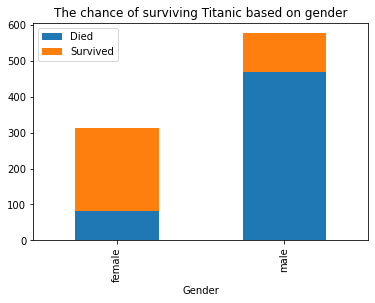

In [11]:
data_df["Died"] = 1 - data_df["Survived"]
data_df.groupby("Sex").agg("sum")[["Died", "Survived"]].plot(kind="bar", stacked=True)
plt.xlabel("Gender")
plt.title("The chance of surviving Titanic based on gender")

If you were female, you were more likely to survive Titanic disaster. Let's now plot the likelyhood of surviving based on class.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

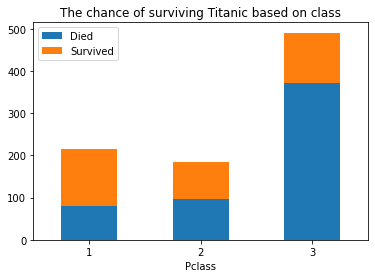

In [12]:
data_df.groupby("Pclass").agg("sum")[["Died", "Survived"]].plot(kind="bar", stacked=True)
plt.xlabel("Pclass")
plt.title("The chance of surviving Titanic based on class")
plt.xticks(rotation=0)

The better class, the higher chance of surviving Titanic crash. We added two new columns to our dataset - cabin letter and title. Let's now plot the chance of surviving based on cabin letter and title.

Text(0.5, 1.0, 'The chance of surviving Titanic based on cabin letter')

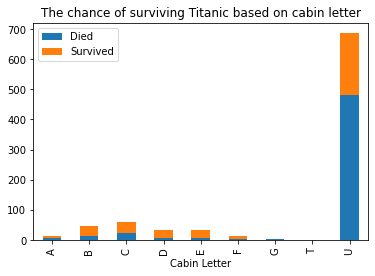

In [13]:
data_df.groupby("Cabin Letter").agg("sum")[["Died", "Survived"]].plot(kind="bar", stacked=True)
plt.title("The chance of surviving Titanic based on cabin letter")

Text(0.5, 1.0, 'The chance of surviving Titanic based on title')

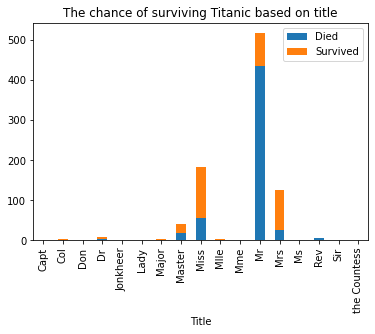

In [14]:
data_df.groupby("Title").agg("sum")[["Died", "Survived"]].plot(kind="bar", stacked=True)
plt.title("The chance of surviving Titanic based on title")

We can see that title and cabin class can affect little bit our survival chances. For example, we can see that people who had title Master had higher chance of surviving the crash than people with title Mr. In the second plot we could see that people who were in the cabin letters D and E had better chance of surviving than people whose cabin letter is unknown(U).

In [15]:
#dropping died column
data_df = data_df.drop("Died", axis=1)

I did not expect that correlation between FarePerPassenger and Survived column. I thought that it would be below 0.10. 

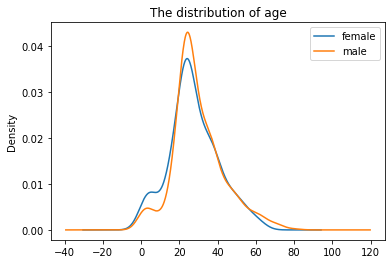

In [16]:
data_df.groupby('Sex')["Age"].plot(kind='kde')
plt.title("The distribution of age")
plt.legend()

## <font color='orange'>4. Feature engineering</font>

In [17]:
#replacing 0 for male and 1 for female
data_df["Sex"] = data_df["Sex"].replace("female", 0)
data_df["Sex"] = data_df["Sex"].replace("male", 1)
data_df["Sex"] = data_df["Sex"].astype("int64")

#test data
data_test_df["Sex"] = data_test_df["Sex"].replace("female", 0)
data_test_df["Sex"] = data_test_df["Sex"].replace("male", 1)
data_test_df["Sex"] = data_test_df["Sex"].astype("int64")

#replacing Embarked
data_df["Embarked"] = data_df["Embarked"].replace("S", 0)
data_df["Embarked"] = data_df["Embarked"].replace("C", 1)
data_df["Embarked"] = data_df["Embarked"].replace("Q", 2)
data_df["Sex"] = data_df["Sex"].astype("int64")

#test data
data_test_df["Embarked"] = data_test_df["Embarked"].replace("S", 0)
data_test_df["Embarked"] = data_test_df["Embarked"].replace("C", 1)
data_test_df["Embarked"] = data_test_df["Embarked"].replace("Q", 2)
data_test_df["Sex"] = data_test_df["Sex"].astype("int64")

#replacing cabin
data_df["Cabin Letter"] = data_df["Cabin Letter"].astype("object")
x = 0
for letter in ["A", "B", "C", "D", "E", "F", "G", "T", "U"]:
    data_df["Cabin Letter"] = data_df["Cabin Letter"].replace(letter, x)
    x = x + 1
data_df["Cabin Letter"] = data_df["Cabin Letter"].astype("int64")

#test data
data_test_df["Cabin Letter"] = data_test_df["Cabin Letter"].astype("object")
x = 0
for letter in ["A", "B", "C", "D", "E", "F", "G", "T", "U"]:
    data_test_df["Cabin Letter"] = data_test_df["Cabin Letter"].replace(letter, x)
    x = x + 1
data_test_df["Cabin Letter"] = data_test_df["Cabin Letter"].astype("int64")

#replacing Title column
y = 0
for letter in data_df["Title"].unique():
    data_df["Title"] = data_df["Title"].replace(letter, y)
    y = y + 1
data_df["Title"] = data_df["Title"].astype("int64")

#test data
y = 0
for letter in data_test_df["Title"].unique():
    data_test_df["Title"] = data_test_df["Title"].replace(letter, y)
    y = y + 1
data_test_df["Title"] = data_test_df["Title"].astype("int64")

data_test_df.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FarePerPassenger,Cabin Letter
0,3,1,34.5,0,0,2,0,7.829200,8
1,3,0,47.0,1,0,0,1,3.500000,8
2,2,1,62.0,0,0,2,0,9.687500,8
3,3,1,27.0,0,0,0,0,8.662500,8
4,3,0,22.0,1,1,0,1,4.095833,8
5,3,1,14.0,0,0,0,0,9.225000,8
6,3,0,30.0,0,0,2,2,7.629200,8
7,2,1,26.0,1,1,0,0,9.666667,8
8,3,0,18.0,0,0,1,1,7.229200,8
9,3,1,21.0,2,0,0,0,8.050000,8


In [18]:
missing_data = data_test_df.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

FarePerPassenger    1
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Embarked            0
Title               0
Cabin Letter        0
dtype: int64


In [19]:
median = data_test_df["FarePerPassenger"].median()
data_test_df["FarePerPassenger"] = data_test_df["FarePerPassenger"].fillna(median)

In [20]:
missing_data = data_test_df.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Embarked            0
Title               0
FarePerPassenger    0
Cabin Letter        0
dtype: int64


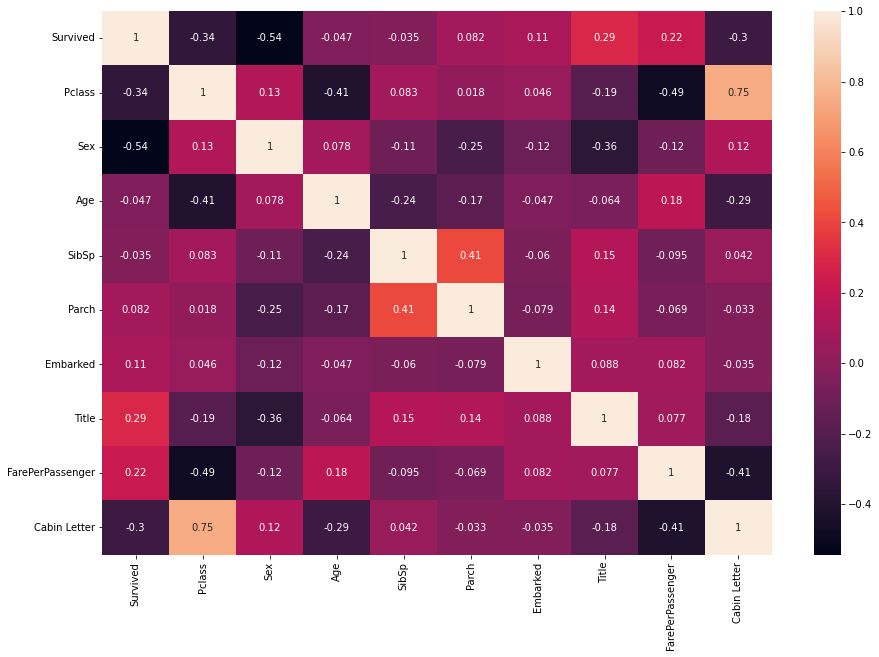

In [21]:
#correlation matrix
corrMatrix = data_df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## <font color='orange'>4. Machine learning</font>

In [22]:
X = data_df.drop("Survived", axis=1).values
y = data_df["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
print(score)
print(confusion_matrix(y_test, y_pred))

0.6940298507462687
[[133  32]
 [ 50  53]]


In [23]:
kf = KFold(n_splits=6, shuffle=True, random_state=43)

knn = KNeighborsClassifier(n_neighbors = 8)
cv_result = cross_val_score(knn, X, y, cv=kf)
cv_result.mean()

0.7396305701674829

In [24]:
clf = svm.SVC(kernel='linear')
cv_result = cross_val_score(clf, X, y, cv=kf)
cv_result.mean()

0.7867918253824294

C:\Users\sembm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


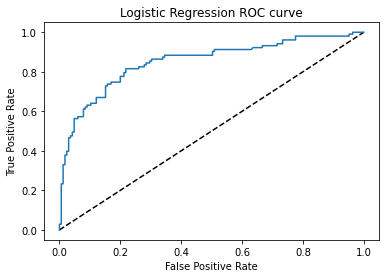

0.8509855839952929


In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC curve")
plt.show()

print(roc_auc_score(y_test, y_pred_probs))

In [26]:
forest = RandomForestClassifier()
cv_result = cross_val_score(forest, X, y, cv=kf)
cv_result

array([0.80536913, 0.81879195, 0.79865772, 0.80405405, 0.77702703,
       0.83108108])

In [27]:
from sklearn.svm import SVC

SVM_KERNEL = "linear"
SVM_C = 10
SVM_GAMMA = 0.00001

X = data_df.drop("Survived", axis=1).values
y = data_df["Survived"].values

svm_model = SVC(kernel = SVM_KERNEL, C = SVM_C, gamma = SVM_GAMMA)
svm_model.fit(X, y)

SVC(C=10, gamma=1e-05, kernel='linear')

In [29]:
y_pred = svm_model.predict(data_test_df)
y_pred

C:\Users\sembm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
result = pd.DataFrame(data_test_2_df['PassengerId'])
print(result.head(10))

   PassengerId
0          892
1          893
2          894
3          895
4          896
5          897
6          898
7          899
8          900
9          901


In [31]:
result.insert(1, "Survived", y_pred, True)
result["Survived"] = pd.to_numeric(result["Survived"], downcast="integer")
print(result.head(10))

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


In [32]:
result = result.set_index('PassengerId')
result.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [ ]:
result.to_csv("Titanic_result_random_forest.csv", index=True)